# Setup

Segment Anything Model (SAM) to przełomowe narzędzie w dziedzinie widzenia komputerowego. Model ten potrafi zidentyfikować i wyodrębnić dowolny obiekt na obrazie na podstawie różnych form wskazówek - może to być punkt, prostokąt czy nawet opis tekstowy. Jest szczególnie użyteczny w zastosowaniach takich jak:
- Automatyczna analiza zdjęć medycznych
- Przetwarzanie zdjęć satelitarnych
- Rozszerzona rzeczywistość
- Edycja zdjęć i wideo

In [ ]:
# !pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-srzf5v9s
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-srzf5v9s
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=83a9baa77ac4ba1ca38bb64855682de149e34cb06e1caeed3a82839b5ca29fce
  Stored in directory: /tmp/pip-ephem-wheel-cache-q7czakzw/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [ ]:
# !pip install -qU transformers diffusers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.0 MB/s eta 0:00:00


## 🔧 Przygotowanie Narzędzi do Przetwarzania i Generowania Obrazów  

Ten kod przygotowuje narzędzia do **zaawansowanego przetwarzania i generowania obrazów**, koncentrując się na trzech głównych obszarach:  
1. 🎨 **Segmentacja obrazu** – identyfikacja i wydzielanie obiektów na obrazie.  
2. 🖌️ **Modyfikacja obrazu (Inpainting)** – edycja i uzupełnianie wybranych fragmentów obrazu.  
3. 📊 **Wizualizacja wyników** – prezentacja oraz analiza efektów działania modeli.  

---

### 📚 **Importy Podstawowe**  
Importowane są:  
- **Numpy (jako np)** – fundamentalne narzędzie do **obliczeń numerycznych** w Pythonie.  
  - Umożliwia szybkie operacje na wielowymiarowych tablicach liczb, co jest kluczowe przy przetwarzaniu obrazów.

---

### 🧠 **Uczenie Maszynowe i Wizja Komputerowa**  
Kod korzysta z trzech kluczowych bibliotek:  
- **PyTorch (torch)** – zaawansowany framework do **uczenia maszynowego**, który napędza modele generatywne.  
- **OpenCV (cv2)** – specjalizuje się w **przetwarzaniu obrazów w czasie rzeczywistym**, oferując m.in. zmianę rozmiaru, przekształcenia kolorów oraz detekcję krawędzi.  
- **PIL (Python Imaging Library)** – uzupełnia zestaw narzędzi do **manipulacji obrazami**, szczególnie przydatny przy konwersji między różnymi formatami.  

---

### 📊 **Wizualizacja Wyników**  
- **Matplotlib (importowany jako plt)** – główna biblioteka do **wizualizacji danych**.  
  - Umożliwia wyświetlanie obrazów i ich transformacji w sposób interaktywny, co jest nieocenione podczas debugowania oraz prezentacji wyników.  

---

### 🤖 **Modele Specjalistyczne**  
Kod wykorzystuje dwa zaawansowane modele:  
- **SAM (Segment Anything Model)** – przełomowy model od Meta AI, który **segmentuje obrazy**, dzieląc je na sensowne części, np. oddzielając obiekt od tła.  
- **StableDiffusionInpaintPipeline** – wyspecjalizowana wersja modelu Stable Diffusion, która **modyfikuje lub uzupełnia wybrane części obrazu**.  
  - Można ją porównać do zaawansowanego narzędzia do retuszu fotografii, które rozumie kontekst i generuje realistyczne uzupełnienia.  

---

### 🔗 **Zintegrowane Podejście**  
Połączenie tych narzędzi umożliwia wykonywanie złożonych operacji na obrazach:  
1. **Segmentacja** za pomocą SAM identyfikuje interesujące obszary.  
2. **Modyfikacja** przy użyciu Stable Diffusion pozwala na kreatywną edycję.  
3. **Wizualizacja** wyników ułatwia analizę i optymalizację procesu.


In [3]:
# Standard library imports
import numpy as np
import os

# Deep learning and computer vision frameworks
import torch
import cv2
from PIL import Image

# Visualization tools
from matplotlib import pyplot as plt

# Model-specific imports
from segment_anything import sam_model_registry, SamPredictor  # SAM for segmentation
from diffusers import StableDiffusionInpaintPipeline  # Stable Diffusion for inpainting

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"

## Ściągnięcie modelu PyTorch, który zawiera wytrenowane wagi modelu.

In [5]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2025-02-17 13:52:58--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.144.74, 18.154.144.87, 18.154.144.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.154.144.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   157MB/s    in 2.3s    

2025-02-17 13:53:01 (157 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [6]:
class CFG:
    device = "cpu"
    sam_checkpoint = '/content/sam_vit_b_01ec64.pth'
    model_type = "vit_b"
    img_path = '/content/doggo.jpg'
    model = "stabilityai/stable-diffusion-2-inpainting"
    dtype = torch.float16

if torch.backends.mps.is_available():
    CFG.device = "mps"
if torch.cuda.is_available():
    CFG.device = "cuda"

print("Device: ", CFG.device)

Device:  cuda


# Functions


In [7]:
def plot_image(img, dis = True):
    plt.imshow(img)
    if dis:
        plt.axis('off')
    plt.show()

# Base

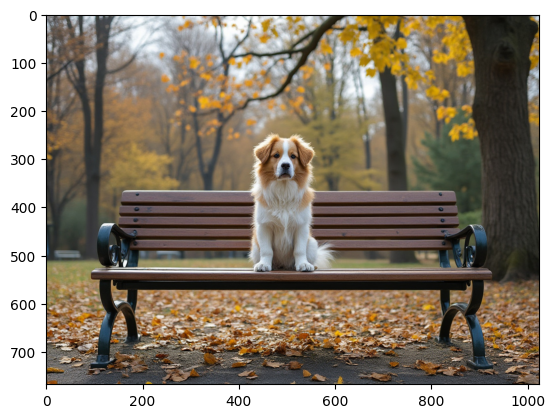

In [8]:
# read and process the image
image = cv2.imread(CFG.img_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plot_image(image_rgb, dis=False)

Ten fragment kodu służy do wczytania i wyświetlenia obrazu, wykonując przy tym ważną konwersję przestrzeni barw. Przeanalizujmy go krok po kroku.

W pierwszej linii funkcja cv2.imread() wczytuje obraz z ścieżki określonej w zmiennej CFG.img_path. OpenCV domyślnie wczytuje obrazy w formacie BGR (Blue-Green-Red), co jest nietypowym formatem w porównaniu do powszechnie używanego RGB (Red-Green-Blue).

Na końcu wywołana zostaje wcześniej zdefiniowana funkcja plot_image() z parametrem dis=False, co oznacza, że obraz zostanie wyświetlony wraz z osiami współrzędnych. Jest to przydatne, gdy chcemy dokładnie określić położenie poszczególnych pikseli w obrazie.

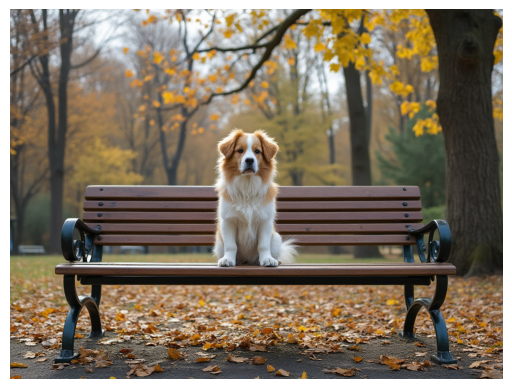

In [9]:
plot_image(image_rgb)

# Inpainting

In [10]:
sam = sam_model_registry[CFG.model_type](checkpoint = CFG.sam_checkpoint)
sam.to(device = CFG.device)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Ten fragment kodu zajmuje się inicjalizacją i konfiguracją modelu SAM (Segment Anything Model), który jest zaawansowanym narzędziem do segmentacji obrazów stworzonym przez Meta AI.

W pierwszej linii tworzona jest instancja modelu SAM. Używamy rejestru modeli sam_model_registry, który pozwala na wybór odpowiedniej architektury modelu określonej w CFG.model_type. Parametr checkpoint wskazuje ścieżkę do pliku z wcześniej wytrenowanymi wagami modelu. To trochę jak wczytywanie gotowej wiedzy do systemu - model został już nauczony rozpoznawać różne obiekty i ich granice na obrazach.

Druga linia przenosi model na określone urządzenie obliczeniowe zdefiniowane w CFG.device. W praktyce może to być GPU (dla szybszych obliczeń) lub CPU. Jest to kluczowy krok dla wydajności - wykonywanie obliczeń na GPU może znacząco przyspieszyć pracę modelu.

W trzeciej linii tworzony jest obiekt SamPredictor, który działa jak interfejs ułatwiający korzystanie z modelu SAM. To narzędzie upraszcza proces segmentacji i udostępnia wygodne metody do pracy z obrazami.

Ostatnia linia przygotowuje model do pracy z konkretnym obrazem poprzez metodę set_image(). Przekazujemy tu nasz wcześniej wczytany i przekonwertowany obraz image_rgb. W tym momencie model przeprowadza wstępną analizę obrazu, wydobywając z niego kluczowe cechy, które będą wykorzystane podczas właściwej segmentacji. Jest to jak przygotowanie szkicu przed rozpoczęciem szczegółowego malowania - model tworzy podstawową reprezentację obrazu, którą później wykorzysta do precyzyjnego wydzielania obiektów.

In [11]:
# Provide points as input prompt [X, Y]-coordinates
input_point = np.array([[500, 500]])
input_label = np.array([1])

Ten fragment kodu definiuje punkty wejściowe, które będą służyć jako wskazówki dla modelu SAM podczas segmentacji obrazu. System działa podobnie jak malarz, któremu wskazujemy palcem miejsce na płótnie, mówiąc "tu chcę wyodrębnić obiekt".

Pierwsza linia tworzy tablicę NumPy zawierającą współrzędne punktu w formacie [X, Y]. W tym przypadku wskazany jest pojedynczy punkt o współrzędnych [500, 500]. Można wyobrazić sobie te współrzędne jako położenie na siatce pikseli obrazu - 500 pikseli w prawo i 500 pikseli w dół od lewego górnego rogu. Jest to jak położenie palca w konkretnym miejscu obrazu.

Druga linia tworzy tablicę etykiet, gdzie wartość 1 oznacza, że wskazany punkt należy do obiektu, który chcemy wysegmentować. System SAM używa tej informacji jako pozytywnego przykładu - "ten punkt jest częścią obiektu, który mnie interesuje". Gdybyśmy chcieli wskazać punkt, który nie należy do interesującego nas obiektu, użylibyśmy wartości 0.

Współrzędne punktu [500, 500] zostały  wybrane na podstawie wcześniejszej analizy obrazu. Jest to kluczowy element procesu segmentacji interaktywnej, gdzie człowiek może wskazywać modelu, które obszary obrazu są istotne.

Format tablic NumPy z podwójnymi nawiasami kwadratowymi ([[500, 500]]) pozwala na łatwe rozszerzenie kodu o więcej punktów wejściowych - moglibyśmy dodać kolejne pary współrzędnych, jeśli jeden punkt nie wystarcza do precyzyjnej segmentacji.

In [12]:
# Predicting Segmentation mask
masks, scores, logits = mask_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

Ten fragment kodu wykonuje kluczową operację segmentacji obrazu przy użyciu modelu SAM, generując maski segmentacyjne na podstawie wcześniej zdefiniowanych punktów wejściowych.

Funkcja predict() przyjmuje trzy parametry.
 - point_coords - to nasze wcześniej zdefiniowane współrzędne punktu [500, 500], które wskazują modelowi, gdzie znajduje się obiekt do segmentacji.
 - point_labels - to etykieta o wartości 1, która informuje model, że wskazany punkt należy do obiektu, który chcemy wysegmentować.
 - multimask_output=False - wyłącza generowanie wielu wariantów masek, co oznacza, że model zwróci tylko jedną, najbardziej prawdopodobną maskę.

Funkcja zwraca trzy elementy.
 - masks - to właściwa maska segmentacyjna, czyli tablica binarna, gdzie wartości 1 oznaczają piksele należące do wysegmentowanego obiektu, a 0 - tło. Jest to jak nakładka na oryginalny obraz, która precyzyjnie wyznacza granice interesującego nas obiektu.
 - scores - zawiera oceny pewności modelu co do wygenerowanej maski. Wyższe wartości oznaczają, że model jest bardziej pewny swojej predykcji dla danego obszaru. Jest to jak miara zaufania modelu do własnych przewidywań.
 - logits - to surowe wartości wyjściowe z modelu przed przekształceniem ich w prawdopodobieństwa. Są one przydatne, jeśli chcemy dostroić proces segmentacji lub zastosować własne progi decyzyjne.

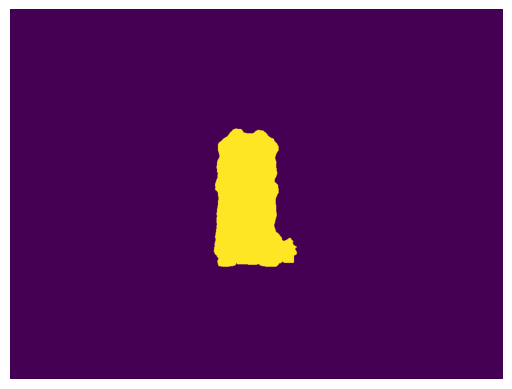

In [13]:
mask = masks.astype(float) * 255
mask = np.transpose(mask, (1, 2, 0))
_ , bw_image = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)

plot_image(mask)

Ten fragment kodu służy do przekształcenia surowej maski segmentacyjnej w format odpowiedni do wizualizacji. Proces ten przypomina przekształcenie szkicu w pełnowartościowy rysunek, który można wyświetlić.

W pierwszej linii maska jest mnożona przez 255 i konwertowana na typ zmiennoprzecinkowy. To przekształcenie skaluje wartości maski z przedziału [0, 1] do przedziału [0, 255], co jest standardowym zakresem dla obrazów w skali szarości. Możemy to porównać do przekształcenia delikatnego szkicu ołówkiem w wyraźny rysunek z pełną gamą odcieni szarości.

Druga linia wykonuje transpozycję wymiarów maski za pomocą np.transpose(). Jest to konieczne, ponieważ model SAM zwraca maskę w formacie (batch, height, width), podczas gdy do wyświetlenia potrzebujemy formatu (height, width, channels). To jak przekładanie kartki papieru z orientacji poziomej na pionową, aby właściwie ułożyć rysunek.

Trzecia linia używa funkcji cv2.threshold() do binaryzacji maski. Operacja ta przekształca obraz w skali szarości na czarno-biały, gdzie wszystkie piksele o wartości powyżej 100 stają się białe (255), a pozostałe czarne (0). Jest to jak narysowanie wyraźnego konturu wokół obiektu, eliminując wszystkie pośrednie odcienie szarości.

Na koniec zmodyfikowana maska jest wyświetlana za pomocą funkcji plot_image(). W rezultacie zobaczymy czarno-białą reprezentację wysegmentowanego obiektu, gdzie biały obszar odpowiada obiektowi wskazanemu przez punkt wejściowy, a czarny obszar reprezentuje tło.

In [14]:
d1,d2 = bw_image.shape

cv2.imwrite('mask1.png', bw_image)
del sam, mask_predictor   # delete models to conserve GPU memory

Ten fragment kodu wykonuje dwie ważne operacje końcowe związane z obsługą maski segmentacyjnej i zarządzaniem pamięcią systemową.

Na początku linia d1,d2 = bw_image.shape pobiera wymiary obrazu binarnego. Jest to przydatne, gdy potrzebujemy znać dokładny rozmiar naszej maski - te wartości mogą być później wykorzystane do dalszego przetwarzania lub sprawdzenia, czy maska ma odpowiednie wymiary. Możemy to porównać do zmierzenia wymiarów płótna przed rozpoczęciem kolejnego etapu pracy.

Następnie cv2.imwrite('mask1.png', bw_image) zapisuje przetworzoną maskę binarną do pliku o nazwie 'mask1.png'. Jest to kluczowy krok, który zachowuje wynik naszej segmentacji na dysku. Podobnie jak artysta, który utrwala swoje dzieło, zapisujemy nasz rezultat w formie, która będzie dostępna nawet po zakończeniu działania programu.

Ostatnia linia del sam, mask_predictor jest szczególnie istotna z punktu widzenia zarządzania zasobami systemowymi. Usuwa ona z pamięci model SAM i prediktor masek, które nie są już potrzebne. Jest to jak sprzątanie warsztatu po zakończonej pracy - zwalniamy miejsce, które może być potrzebne do kolejnych operacji. Jest to szczególnie ważne przy pracy z GPU, gdzie pamięć jest cennym zasobem, a modele uczenia głębokiego mogą zajmować jej znaczną część. Efektywne zarządzanie pamięcią pozwala na płynne działanie kolejnych etapów przetwarzania lub uruchomienie innych modeli.

In [15]:
# Load images using PIL
init_image = Image.open(CFG.img_path)
mask_image = Image.open('./mask1.png')

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    CFG.model, torch_dtype = CFG.dtype
)
pipe = pipe.to(CFG.device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Ten fragment kodu wprowadza nas w kolejną fazę przetwarzania obrazu - inpainting przy użyciu modelu Stable Diffusion, który potrafi kreatywnie wypełniać lub modyfikować wybrane obszary obrazu.

Pierwsze dwie linie wczytują obrazy przy użyciu biblioteki PIL (Python Imaging Library). Jest to zmiana w stosunku do wcześniej używanego OpenCV, ponieważ Stable Diffusion jest zoptymalizowany do pracy z obrazami w formacie PIL. Wczytywany jest oryginalny obraz (init_image) oraz nasza wcześniej utworzona maska (mask_image). To jak przygotowanie płótna i szablonu przed rozpoczęciem malowania.

Następnie inicjalizowany jest pipeline (potok) Stable Diffusion, specjalnie dostosowany do zadań inpainting. Używamy tu konkretnego modelu "stabilityai/stable-diffusion-2-inpainting", który został wytrenowany właśnie do tego typu zadań. Parametr torch_dtype=torch.float16 określa precyzję obliczeń - używamy połowy standardowej precyzji (16 bitów zamiast 32), co jest kompromisem między dokładnością a efektywnością wykorzystania pamięci GPU.

Ostatnia linia przenosi cały pipeline na określone urządzenie (najczęściej GPU) zdefiniowane w CFG.device. Jest to konieczne, ponieważ Stable Diffusion to złożony model wymagający znacznej mocy obliczeniowej. Przeniesienie go na GPU znacząco przyspieszy proces generowania obrazu.

Ten etap można porównać do przygotowania zaawansowanego warsztatu artystycznego, gdzie mamy już przygotowane płótno (oryginalny obraz), szablon (maska) i wszystkie niezbędne narzędzia (model Stable Diffusion) do rozpoczęcia kreatywnego procesu wypełniania lub modyfikacji wybranych obszarów obrazu. Model będzie działał jak wysoce wykwalifikowany artysta, który potrafi wypełnić wskazane obszary obrazu w sposób spójny z resztą kompozycji.

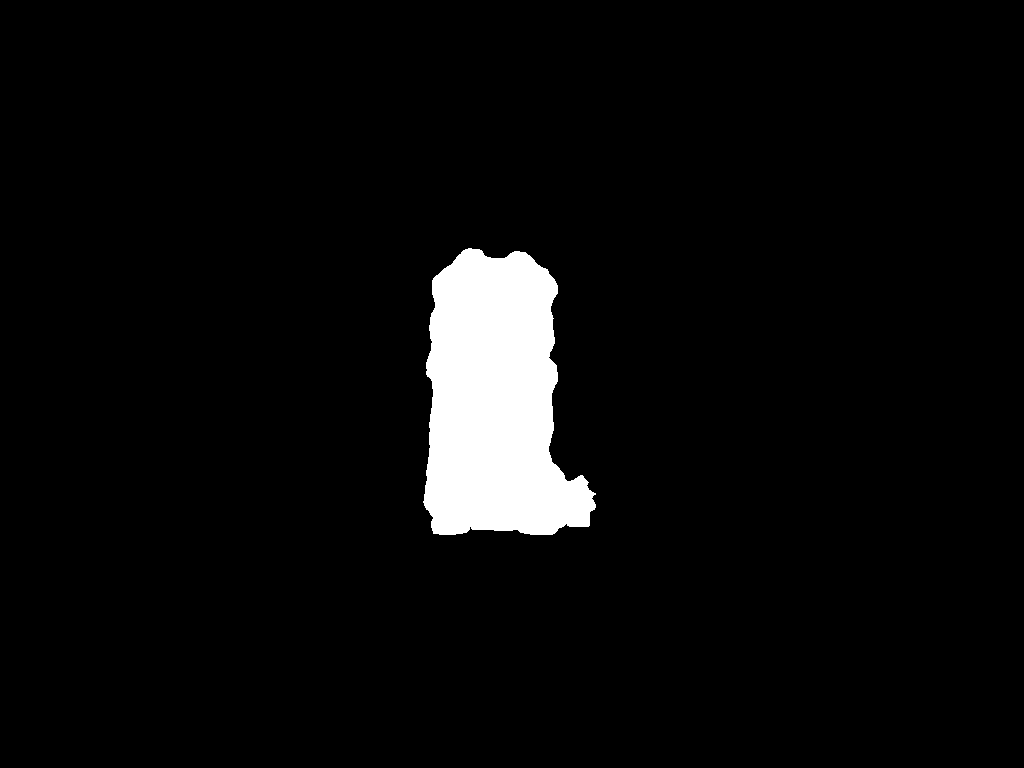

In [16]:
mask_image

In [17]:
prompt = "a grey cat sitting on a bench, high resolution"
image = pipe(prompt=prompt,
             image=init_image,
             mask_image=mask_image,
             width = d2, height = d1).images[0]
image.save('output1.png')

  0%|          | 0/50 [00:00<?, ?it/s]

Ten fragment kodu realizuje finalny etap naszego procesu - kreatywną modyfikację obrazu przy użyciu modelu Stable Diffusion.  

Zaczynamy od zdefiniowania zmiennej prompt, która zawiera tekstowy opis tego, co chcemy zobaczyć w miejscu zaznaczonym przez maskę: "a grey cat sitting on a bench, high resolution". Ten prompt działa jak szczegółowa instrukcja dla artysty - mówimy modelowi, że chcemy zobaczyć szarego kota siedzącego na ławce, a obraz ma być wysokiej rozdzielczości.

Następnie wywołujemy pipeline (pipe) z czterema kluczowymi parametrami. Prompt przekazuje nasze tekstowe instrukcje. Init_image to oryginalny obraz, który będzie modyfikowany. Mask_image wskazuje obszary, które mają zostać zmienione - tylko piksele oznaczone na biało w masce zostaną zmodyfikowane, podczas gdy czarne pozostaną nietknięte. Parametry width i height (pochodzące z wcześniej zapisanych zmiennych d2 i d1) zapewniają, że nowy obraz będzie miał dokładnie te same wymiary co oryginał.

Wywołanie pipe() uruchamia złożony proces generatywny. Model analizuje oryginalny obraz, czyta nasz prompt i generuje nową zawartość, która zastępuje zaznaczony obszar. Co istotne, model stara się stworzyć obraz, który będzie spójny z resztą sceny - nowy element (kot na ławce) powinien pasować do otoczenia pod względem oświetlenia, perspektywy i stylu.

Wynik jest dostępny jako pierwsza pozycja w liście images (stąd [0] na końcu) i zostaje zapisany do pliku 'output1.png'. Ten ostatni krok zachowuje efekt naszej pracy, pozwalając na porównanie rezultatu z oryginalnym obrazem i dalsze wykorzystanie stworzonej modyfikacji.

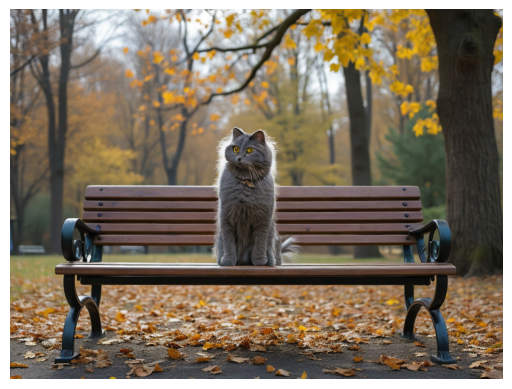

In [18]:
out_image = cv2.imread('./output1.png')
out_image_rgb = cv2.cvtColor(out_image, cv2.COLOR_RGB2BGR)

plot_image(out_image_rgb )

Ten końcowy fragment kodu służy do wczytania i wyświetlenia naszego przetworzonego obrazu, zamykając tym samym pełny cykl modyfikacji.

Pierwsza linia wczytuje wygenerowany obraz z pliku 'output1.png' przy użyciu funkcji cv2.imread(). OpenCV ponownie wchodzi do gry, ponieważ jest świetnym narzędziem do końcowej obróbki i wyświetlania obrazów. W tym momencie obraz jest wczytywany w formacie BGR, co jest standardowym zachowaniem OpenCV.

Na końcu wykorzystujemy naszą wcześniej zdefiniowaną funkcję plot_image() do wyświetlenia przetworzonego obrazu. W tym momencie powinniśmy zobaczyć efekt końcowy naszej pracy - oryginalny obraz z obszarem wskazanym przez maskę zastąpionym nową zawartością zgodną z naszym promptem (szary kot siedzący na ławce).

Ten fragment kodu zamyka pełny cykl przetwarzania obrazu, który rozpoczęliśmy od segmentacji przy użyciu SAM, przez generację maski, aż po kreatywną modyfikację przy użyciu Stable Diffusion. Jest to przykład zaawansowanego pipeline'u łączącego różne techniki sztucznej inteligencji do twórczej manipulacji obrazami.

# Outpainting

In [19]:
# Read the image from the path
image = cv2.imread(CFG.img_path)
height, width = image.shape[:2]
padding = 100 # num pixels to outpaint


Ten fragment kodu rozpoczyna przygotowania do techniki znanej jako "outpainting" - rozszerzania obrazu poza jego oryginalne granice. Jest to jak przygotowanie płótna do dodania nowych elementów wokół istniejącego obrazu.

Pierwsza linia wczytuje obraz z lokalizacji określonej w naszej klasie konfiguracyjnej CFG. Funkcja cv2.imread() otwiera obraz w formacie BGR, co jest standardowym zachowaniem OpenCV. To początek naszej pracy - jak rozłożenie obrazu na stole przed rozpoczęciem jego modyfikacji.

Następnie pobieramy wymiary obrazu za pomocą image.shape[:2]. Ta składnia jest interesująca: shape zwraca krotkę zawierającą wysokość, szerokość i liczbę kanałów kolorów, ale [:2] wybiera tylko dwa pierwsze elementy - wysokość i szerokość. Te wartości są przypisywane do zmiennych height i width, które będą kluczowe dla dalszych obliczeń. Jest to jak zmierzenie płótna przed dodaniem do niego nowych elementów.

Na końcu definiujemy zmienną padding o wartości 100. Jest to liczba pikseli, o którą chcemy poszerzyć obraz z każdej strony. Możemy to porównać do dodania pustego marginesu wokół obrazu - miejsca, które później zostanie wypełnione nową, wygenerowaną zawartością. Wartość 100 pikseli oznacza, że dodamy znaczącą przestrzeń do oryginalnego obrazu, dając systemowi wystarczająco dużo miejsca na kreatywne rozszerzenie sceny.

Ta część kodu stanowi fundament dla następnych operacji, gdzie będziemy musieli stworzyć większe płótno i przygotować maskę określającą, które obszary mają zostać wypełnione nową zawartością.

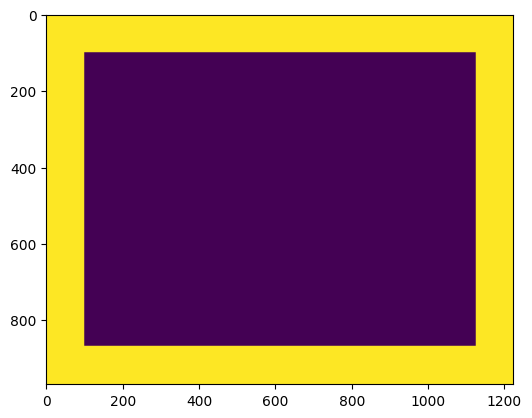

True

In [20]:
mask = np.ones((height+2*padding, width+2*padding), dtype=np.uint8) * 255
mask[padding:-padding, padding:-padding] = 0

plot_image(mask, dis = False)
cv2.imwrite("mask2.png", mask)

Ten fragment kodu tworzy maskę dla techniki outpainting, która wskazuje obszary do wygenerowania nowej zawartości. Proces ten można porównać do przygotowania szablonu, który określa, gdzie artysta ma namalować nowe elementy obrazu.

W pierwszej linii tworzymy tablicę numpy o wymiarach większych niż oryginalny obraz - dodajemy padding (100 pikseli) z każdej strony. Użycie np.ones() tworzy tablicę wypełnioną wartościami 1, które następnie mnożymy przez 255, otrzymując białą maskę. Parametr dtype=np.uint8 określa typ danych jako 8-bitowe liczby całkowite bez znaku, co jest standardem dla obrazów w skali szarości. Możemy to wyobrazić sobie jako białą kartkę papieru, która jest większa niż nasz oryginalny obraz.

W drugiej linii wykonujemy kluczową operację - ustawiamy środkową część maski (odpowiadającą rozmiarowi oryginalnego obrazu) na wartość 0 (kolor czarny). Składnia padding:-padding oznacza "od punktu padding do punktu -padding", co jest eleganckim sposobem na wybranie środkowej części tablicy. Jest to jak wycięcie prostokątnego otworu w środku naszej białej kartki, dokładnie w miejscu gdzie znajduje się oryginalny obraz.

Następnie wyświetlamy maskę za pomocą naszej funkcji plot_image() z parametrem dis=False, co pozwala zobaczyć osie współrzędnych i lepiej zrozumieć wymiary maski. Zobaczymy czarny prostokąt (wartości 0) otoczony białym obramowaniem (wartości 255). Ten wizualny podgląd pomaga zweryfikować, czy maska została utworzona poprawnie.

Na końcu zapisujemy maskę do pliku "mask2.png" używając cv2.imwrite(). Ta maska będzie później używana przez model do określenia, które obszary należy wypełnić nową zawartością - białe obszary zostaną wypełnione, podczas gdy czarne pozostaną nietknięte.

W kontekście outpaintingu ta maska ma szczególne znaczenie - wskazuje modelowi, że ma zachować oryginalną zawartość w środku (czarny obszar) i wygenerować nową zawartość na obrzeżach (białe obszary), tworząc płynne przejście między istniejącym obrazem a nowo wygenerowaną zawartością.

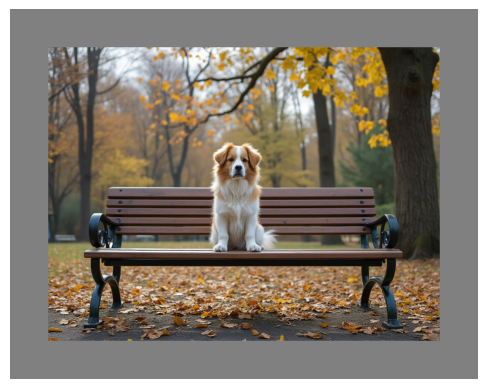

True

In [21]:
# extend the original image
image_extended = np.pad(image, ((padding, padding), (padding, padding), (0, 0)),
                        mode='constant', constant_values=128)
image_extended = cv2.cvtColor(image_extended, cv2.COLOR_RGB2BGR)


plot_image(image_extended)
d1,d2,d3 = image_extended.shape

cv2.imwrite("image_extended.png", image_extended)

Ten kod wykonuje kilka operacji na obrazie:

Najpierw powiększa oryginalny obraz dodając do niego szary margines. Funkcja np.pad() dodaje piksele dookoła obrazu - parametr padding określa szerokość tego marginesu z każdej strony. Nowe piksele mają wartość 128, co daje kolor szary.

Następnie przekształca przestrzeń kolorów z RGB na BGR używając cv2.cvtColor(). Jest to konieczne, ponieważ OpenCV domyślnie używa formatu BGR zamiast RGB.

Funkcja plot_image() wyświetla tak przygotowany obraz.

W kolejnym kroku kod pobiera wymiary przetworzonego obrazu i zapisuje je do zmiennych d1, d2 i d3. Reprezentują one odpowiednio wysokość, szerokość i liczbę kanałów koloru.

Na końcu zapisuje obraz do pliku "image_extended.png" za pomocą funkcji cv2.imwrite().

In [24]:
# Load images using PIL
init_image = Image.open('./image_extended.png')
mask_image = Image.open('./mask2.png')

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    CFG.model,  torch_dtype = CFG.dtype)

pipe = pipe.to(CFG.device)

inpaint_image = pipe(prompt="a dog on a bench in a park",
                     image=init_image,
                     mask_image=mask_image,
                    width = d2, height = d1).images[0]
inpaint_image.save('output2.png')

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Ten kod wykorzystuje zaawansowaną technikę sztucznej inteligencji do uzupełniania fragmentów obrazu, zwaną inpainting. Przeanalizujmy go krok po kroku:

Na początku kod wczytuje dwa kluczowe pliki obrazów za pomocą biblioteki PIL (Python Imaging Library). init_image to główny obraz, który będziemy modyfikować, a mask_image to specjalna maska wskazująca, które części obrazu mają zostać zmienione - działa ona jak szablon określający obszar do uzupełnienia.

Następnie kod tworzy instancję modelu Stable Diffusion, który jest specjalistycznym modelem sztucznej inteligencji zaprojektowanym do generowania i modyfikowania obrazów. Model jest ładowany z wcześniej zdefiniowanych ustawień zapisanych w CFG.model. Parametr torch_dtype określa precyzję obliczeń numerycznych, co ma wpływ na jakość generowania i zużycie pamięci.

W kolejnej linii model jest przenoszony na odpowiednie urządzenie obliczeniowe za pomocą metody to(). Jest to istotny krok, ponieważ generowanie obrazów wymaga znacznej mocy obliczeniowej.

Najważniejsza część kodu to wywołanie funkcji pipe(), która wykonuje właściwe uzupełnianie obrazu. Funkcja przyjmuje kilka istotnych parametrów:
- prompt to tekstowy opis tego, co ma zostać wygenerowane ("pies na ławce w parku")
- image to nasz obraz wejściowy
- mask_image to maska określająca obszar do zmodyfikowania
- width i height określają wymiary wyjściowego obrazu, wykorzystując wcześniej zapisane wartości d1 i d2

Model łączy te wszystkie informacje, aby wygenerować realistyczne uzupełnienie wskazanego obszaru, które pasuje do reszty obrazu i spełnia opis podany w prompt.

Na końcu wygenerowany obraz jest zapisywany do pliku output2.png, gdzie możemy zobaczyć efekt działania modelu.

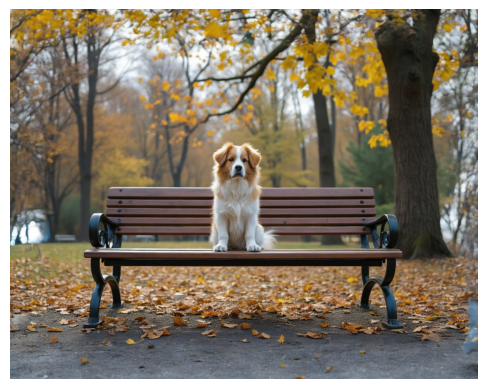

In [25]:
image = cv2.imread('./output2.png')


plot_image(image)